In [36]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [37]:
dat = pd.read_csv('out_clean.csv')
dat.head(10)

,Date,Total Generation (KWH),Insolation,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains,NO-OFF-CLEAN MODULES
0,2012-07-06,3218.00,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2012-07-07,3633.00,9.37536,1,0,0,0,0,0,0,0,0,0,0,0,0.0
2,2012-07-08,4377.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,2012-07-09,4625.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
4,2012-07-10,648.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
5,2012-07-11,3012.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
6,2012-07-12,3545.00,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
7,2012-07-13,3100.93,9.37536,0,1,0,0,0,0,0,0,0,0,0,0,0.0
8,2012-07-14,2940.03,4.72300,0,1,0,0,0,0,0,0,0,0,0,0,0.0
9,2012-07-15,3357.00,3.94200,1,0,0,0,0,0,0,0,0,0,0,0,0.0


In [38]:
dat.columns

Index(['Date', 'Total Generation (KWH)', 'Insolation', 'Grid Failure',
       'Inverter', 'Module Cleaning', 'Rainy day', 'No Module Cleaning',
       'Transformer replacement and maintenance', 'Cable and Fuse maintenance',
       'Plant Shutdown', 'Internet', 'Battery', 'Cloudy',
       'Module Cleaning by rains', 'NO-OFF-CLEAN MODULES'],
      dtype='object')

In [39]:
dat.drop(['Insolation', 'Internet', 'Date'],axis=1,inplace=True)

In [40]:
dat=dat[['Total Generation (KWH)','Grid Failure','Module Cleaning','Cloudy','No Module Cleaning']]

In [41]:
dat.dropna(inplace=True)

In [42]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Generation (KWH)  2370 non-null   float64
 1   Grid Failure            2370 non-null   int64  
 2   Module Cleaning         2370 non-null   int64  
 3   Cloudy                  2370 non-null   int64  
 4   No Module Cleaning      2370 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 92.7 KB


In [43]:
dat.head()

,Total Generation (KWH),Grid Failure,Module Cleaning,Cloudy,No Module Cleaning
0,3218.0,1,0,0,0
1,3633.0,1,0,0,0
2,4377.0,0,0,0,0
3,4625.0,0,0,0,0
4,648.0,0,0,0,0


In [44]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dat)
print(chi_square_value)
print(p_value)

712.1989028522485
1.5098688924197383e-146


In [45]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dat)
kmo_model

0.5229324366870269

In [61]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(6,rotation=None,svd_method='randomized')
fa.fit(dat, 6)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.55115207, 1.15105296, 0.93940008, 0.8207778 , 0.53761709])

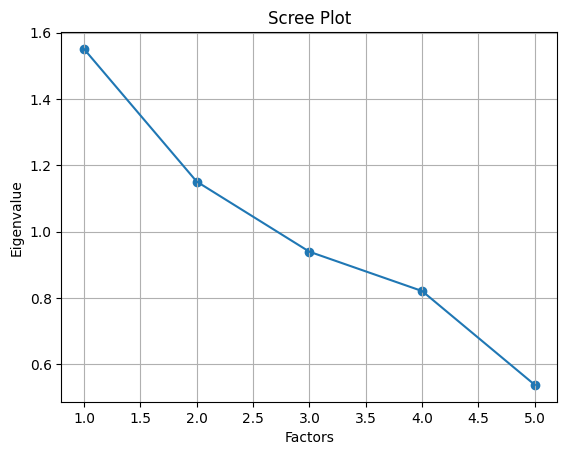

In [62]:
plt.scatter(range(1,dat.shape[1]+1),ev)
plt.plot(range(1,dat.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [67]:
fa = FactorAnalyzer(rotation="varimax")
fa.fit(dat, 6)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [68]:
res = fa.loadings_
res

array([[-0.5248027 , -0.07741397, -0.24942743],
       [ 0.03391582, -0.08307445,  0.47800989],
       [-0.20354607, -0.33040332,  0.01714911],
       [ 0.8524212 ,  0.09591423, -0.09853844],
       [-0.0178706 ,  0.42523871, -0.0734726 ]])

In [65]:
dat.columns

Index(['Total Generation (KWH)', 'Grid Failure', 'Module Cleaning', 'Cloudy',
       'No Module Cleaning'],
      dtype='object')

In [69]:
#rows are the features
df = pd.DataFrame(res, columns = ['factor1','factor2','factor3'], index=['Total Generation (KWH)','Grid Failure','Module Cleaning','Cloudy','No Module Cleaning'])
df

,factor1,factor2,factor3
Total Generation (KWH),-0.524803,-0.077414,-0.249427
Grid Failure,0.033916,-0.083074,0.478010
Module Cleaning,-0.203546,-0.330403,0.017149
Cloudy,0.852421,0.095914,-0.098538
No Module Cleaning,-0.017871,0.425239,-0.073473


In [52]:
dfvar = pd.DataFrame(fa.get_factor_variance(), columns = ['factor1','factor2','factor3'], index=['SS Loadings','Proportion Var','Cumulative Var'])
dfvar

,factor1,factor2,factor3
SS Loadings,1.044940,0.312088,0.306110
Proportion Var,0.208988,0.062418,0.061222
Cumulative Var,0.208988,0.271406,0.332628


Pros and Cons of Factor Analysis
Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.



In [53]:
fa.get_communalities() 
#Calculate the communalities, given the factor loading matrix.

array([0.34362484, 0.2365451 , 0.15089145, 0.74553127, 0.18654554])